# SPIRATEC CUMMINS FILTERS: First Analysis

### Author: PhD Daniel Diaz-Almeida

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')
sns.set(context='paper', style='darkgrid', palette=sns.color_palette("Set1"), font='sans-serif', font_scale=1.3, color_codes=True, rc=None)

## Introduction

In this report, a dataset of different measurements of the Spiratec Filters has been assessed.

The porpuse of this analysis has been to determine the feasibility to stablish a relationship between measured vital signs and filter mass. In order to perform the assessment, the data was imported from a *.csv file into a DataFrame which had more han 1.2MM rows (observations) and 74 attributes ranging from the adquisition date to the escape gas tempeture (EGT).

The data presents a good distribution and good enough observations to perform an estimation 

## Data Analysis

In [2]:
file = "combinedFilters_csv.csv"
%time filt_df = pd.read_csv(file, delimiter=',')
filt_df.shape

Wall time: 7.42 s


(1295116, 74)

Below, the first five observations can be appreciated. The attributes names are too long, so they have been changed for shorter ones

In [3]:
filt_df.head()

,ESN,AVL,Vehículo,Fecha Servidor,Fecha AVL,RPM,Pedal,F. de Carga,Potencia,Estado Motor,...,Engine Operating State (bit),Engine Turbocharger 1 Compressor Inlet Pressure (kPa),Engine Protection System has Shutdown Engine (bit),Engine Protection System Approaching Shutdown (bit),Engine Protection System Timer State (bit),Engine Oil Filter Differential Pressure (Extended Range) (PSI),Engine Oil Priming Pump Control (bit),Engine Controlled Shutdown Request (bit),Engine Emergency (Immediate) Shutdown Indication (bit),Power (HP)
0,66301308,7156,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,1880.00,100.0,100.0,3276.24,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3276.24
1,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,1915.50,99.2,100.0,3302.59,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3302.59
2,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,1897.63,98.8,100.0,3306.96,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.80,3.0,0.0,0.0,3306.96
3,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,1906.75,98.8,100.0,3322.85,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.08,3.0,0.0,0.0,3322.85
4,66301308,7156,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,1915.25,99.2,100.0,3302.16,Potencia,...,15.0,0.0,0.0,3.0,3.0,0.73,3.0,0.0,0.0,3302.16


Regarding the information of the DataFrame, it can be notice the none-null values as well as the data type of each attribute. There are several null values in the dataset which are going to be treated later for the predictive model

In [4]:
filt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295116 entries, 0 to 1295115
Data columns (total 74 columns):
 #   Column                                                          Non-Null Count    Dtype  
---  ------                                                          --------------    -----  
 0   ESN                                                             1295116 non-null  int64  
 1   AVL                                                             1295116 non-null  int64  
 2   Vehículo                                                        1295116 non-null  object 
 3   Fecha Servidor                                                  1295116 non-null  object 
 4   Fecha AVL                                                       1295116 non-null  object 
 5   RPM                                                             1295116 non-null  float64
 6   Pedal                                                           1295116 non-null  float64
 7   F. de Carga                

New column names (shorter names) have been used for better data readability as well as to avoid code error messages reading the DataFrame columns 

In [5]:
newcols = {"ESN":"ESN",
           "AVL":"AVL",
           "Vehículo":"Vehicle",
           "Fecha Servidor":"Serv Date",
           "Fecha AVL":"AVL Date",
           "RPM":"RPM",
           "Pedal":"Pedal",
           "F. de Carga":"Load F",
           "Potencia":"Power",
           "Estado Motor":"Eng state",
           "Engine Torque Mode ()":"Eng Torque Mode",
           "Actual Percent Torque (%)":"Actual Torque (%)",
           "Actual Speed (RPM)":"ActSpeed (RPM)",
           "Accelerator position (%)":"AccelPosition (%)",
           "Percent Load At Current Speed (%)":"Load at CurrSpeed (%)",
           "Fuel rate (L/h)":"Fuel rate (L/h)",
           "Barometric Pressure (PSI)":"Bar Pressure (PSI)",
           "IMP-LB (PSI)":"IMP-LB (PSI)",
           "IMT-LBF (F)":"IMT-LBF (F)",
           "EGT-AV (F)":"EGT-AV (F)",
           "Battery potential (V)":"Battery pot (V)",
           "Coolant temperature (F)":"Coolant T (F)",
           "Fuel Temperature (F)":"Fuel T (F)",
           "Engine Oil Temperature (F)":"EngOil T (F)",
           "Injector Metering (PSI)":"Inject Met (PSI)",
           "Injector Timing (PSI)":"Inj Timing (PSI)",
           "Pre-filter Oil Pressure (PSI)":"Pre-filtOil Press (PSI)",
           "Instantaneous Estimated Brake Power (HP)":"InstantEst B-Power (HP)",
           "IMT-LBR (F)":"IMT-LBR (F)",
           "IMT-RBF (F)":"IMT-RBF (F)",
           "IMT-RBR (F)":"IMT-RBR (F)",
           "IMP-RB (PSI)":"IMP-RB (PSI)",
           "IMP-RB (MCRS) (PSI)":"IMP-RB (MCRS) (PSI)",
           "Oil Differential Pressure (PSI)":"OilDiff Press (PSI)",
           "Ecu temperature (F)":"Ecu T (F)",
           "EGT-01 (F)":"EGT-01 (F)",
           "EGT-02 (F)":"EGT-02 (F)",
           "EGT-03 (F)":"EGT-03 (F)",
           "EGT-04 (F)":"EGT-04 (F)",
           "EGT-05 (F)":"EGT-05 (F)",
           "EGT-06 (F)":"EGT-06 (F)",
           "EGT-07 (F)":"EGT-07 (F)",
           "EGT-08 (F)":"EGT-08 (F)",
           "EGT-09 (F)":"EGT-09 (F)",
           "EGT-10 (F)":"EGT-10 (F)",
           "EGT-11 (F)":"EGT-11 (F)",
           "EGT-12 (F)":"EGT-12 (F)",
           "EGT-13 (F)":"EGT-13 (F)",
           "EGT-14 (F)":"EGT-14 (F)",
           "EGT-15 (F)":"EGT-15 (F)",
           "EGT-16 (F)":"EGT-16 (F)",
           "Crankcase Pressure (HPI) (in-H2O)":"CC Press (HPI) (in-H2O)",
           "Engine Oil Level (%)":"EngOil Level (%)",
           "Post Oil Filter (PSI)":"PostOil Filt (PSI)",
           "Rifle Oil Pressure (PSI)":"RifleOil Press (PSI)",
           "Coolant Pressure (PSI)":"Coolant Press (PSI)",
           "Ambient Temperature (F)":"Ambient T (F)",
           "EGT-17 (F)":"EGT-17 (F)",
           "EGT-18 (F)":"EGT-18 (F)",
           "IMT-LBM (F)":"IMT-LBM (F)",
           "IMT-RBM (F)":"IMT-RBM (F)",
           "Remote accelerator pedal position (%)":"RemoAccelPedal Pos (%)",
           "Engine Pre-filter Oil Pressure (Extended Range) (PSI)":"EngPre-filterOil Pres (Extended) (PSI)",
           "Post Oil Filter (Extended Range) (PSI)":"PostOilFilt (Extended) (PSI)",
           "Engine Operating State (bit)":"EngOp State (bit)",
           "Engine Turbocharger 1 Compressor Inlet Pressure (kPa)":"EngTcharger 1 CompInlet Press (kPa)",
           "Engine Protection System has Shutdown Engine (bit)":"EngProSyst SD Eng (bit)",
           "Engine Protection System Approaching Shutdown (bit)":"EngProSyst App SD (bit)",
           "Engine Protection System Timer State (bit)":"EngProSys TS (bit)",
           "Engine Oil Filter Differential Pressure (Extended Range) (PSI)":"EngOilFiltDiff Press (Extended) (PSI)",
           "Engine Oil Priming Pump Control (bit)":"EngOilPrPump Control (bit)",
           "Engine Controlled Shutdown Request (bit)":"EngControlled SD Request (bit)",
           "Engine Emergency (Immediate) Shutdown Indication (bit)":"EngE (Immediate) SD Ind (bit)",
           "Power (HP)":"Power (HP)"}

In [6]:
filt_df.rename(columns=newcols, inplace=True)
filt_df.columns.values

array(['ESN', 'AVL', 'Vehicle', 'Serv Date', 'AVL Date', 'RPM', 'Pedal',
       'Load F', 'Power', 'Eng state', 'Eng Torque Mode',
       'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
       'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
       'IMP-LB (PSI)', 'IMT-LBF (F)', 'EGT-AV (F)', 'Battery pot (V)',
       'Coolant T (F)', 'Fuel T (F)', 'EngOil T (F)', 'Inject Met (PSI)',
       'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
       'InstantEst B-Power (HP)', 'IMT-LBR (F)', 'IMT-RBF (F)',
       'IMT-RBR (F)', 'IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
       'OilDiff Press (PSI)', 'Ecu T (F)', 'EGT-01 (F)', 'EGT-02 (F)',
       'EGT-03 (F)', 'EGT-04 (F)', 'EGT-05 (F)', 'EGT-06 (F)',
       'EGT-07 (F)', 'EGT-08 (F)', 'EGT-09 (F)', 'EGT-10 (F)',
       'EGT-11 (F)', 'EGT-12 (F)', 'EGT-13 (F)', 'EGT-14 (F)',
       'EGT-15 (F)', 'EGT-16 (F)', 'CC Press (HPI) (in-H2O)',
       'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
       'Co

A search for null values have been done in order to check if there are any which can affect the dataset observations. Below it can be observed the columns as well as the rows with zero entries 

In [8]:
%time idx = [np.any(filt_df.iloc[:,i]==0.0) for i in range(filt_df.shape[1])]
filt_df.iloc[:,idx]

Wall time: 359 ms


,Actual Torque (%),Load at CurrSpeed (%),IMP-LB (PSI),Inject Met (PSI),InstantEst B-Power (HP),IMP-RB (PSI),IMP-RB (MCRS) (PSI),OilDiff Press (PSI),CC Press (HPI) (in-H2O),EngOil Level (%),RemoAccelPedal Pos (%),EngTcharger 1 CompInlet Press (kPa),EngProSyst SD Eng (bit),EngOilFiltDiff Press (Extended) (PSI),EngControlled SD Request (bit),EngE (Immediate) SD Ind (bit)
0,94.0,100.0,32.49,156.37,3254.66,32.85,32.85,4.06,3.21,0.0,0.0,0.0,0.0,3.63,0.0,0.0
1,93.0,100.0,34.52,157.50,3280.13,34.23,34.23,2.61,2.41,0.0,0.0,0.0,0.0,2.18,0.0,0.0
2,94.0,100.0,35.39,159.77,3285.50,35.59,35.59,6.38,3.81,0.0,0.0,0.0,0.0,5.80,0.0,0.0
3,94.0,100.0,35.68,160.90,3300.25,36.13,36.13,5.15,3.01,0.0,0.0,0.0,0.0,5.08,0.0,0.0
4,93.0,100.0,36.55,163.17,3278.79,36.31,36.31,0.80,3.81,0.0,0.0,0.0,0.0,0.73,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295111,94.0,100.0,40.32,168.83,3278.79,38.96,38.96,3.84,3.01,0.0,0.0,0.0,0.0,3.63,0.0,0.0
1295112,93.0,100.0,39.16,160.90,3273.43,37.96,37.96,3.55,4.42,0.0,0.0,0.0,0.0,2.90,0.0,0.0
1295113,94.0,100.0,36.55,158.07,3289.52,35.95,35.95,3.63,2.21,0.0,0.0,0.0,0.0,3.63,0.0,0.0
1295114,94.0,100.0,36.84,158.64,3288.18,36.13,36.13,4.93,3.21,0.0,0.0,0.0,0.0,4.35,0.0,0.0


In [9]:
%time filt_df[~filt_df.isnull()]

Wall time: 1.24 s


,ESN,AVL,Vehicle,Serv Date,AVL Date,RPM,Pedal,Load F,Power,Eng state,...,EngOp State (bit),EngTcharger 1 CompInlet Press (kPa),EngProSyst SD Eng (bit),EngProSyst App SD (bit),EngProSys TS (bit),EngOilFiltDiff Press (Extended) (PSI),EngOilPrPump Control (bit),EngControlled SD Request (bit),EngE (Immediate) SD Ind (bit),Power (HP)
0,66301308,7156,CA-116,2019-06-24 14:28:36,2019-06-24 14:28:36,1880.00,100.0,100.0,3276.24,Transicion,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3276.24
1,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:28:51,1915.50,99.2,100.0,3302.59,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.18,3.0,0.0,0.0,3302.59
2,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:06,1897.63,98.8,100.0,3306.96,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.80,3.0,0.0,0.0,3306.96
3,66301308,7156,CA-116,2019-06-24 14:29:26,2019-06-24 14:29:21,1906.75,98.8,100.0,3322.85,Potencia,...,15.0,0.0,0.0,3.0,3.0,5.08,3.0,0.0,0.0,3322.85
4,66301308,7156,CA-116,2019-06-24 14:29:41,2019-06-24 14:29:36,1915.25,99.2,100.0,3302.16,Potencia,...,15.0,0.0,0.0,3.0,3.0,0.73,3.0,0.0,0.0,3302.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295111,66304554,7177,CA-97,2019-10-31 04:52:50,2019-10-31 04:51:28,1894.00,98.8,100.0,3300.63,Potencia,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3300.63
1295112,66304554,7177,CA-97,2019-10-31 04:54:44,2019-10-31 04:54:38,1911.50,99.2,100.0,3295.69,Transicion,...,15.0,0.0,0.0,3.0,3.0,2.90,3.0,0.0,0.0,3295.69
1295113,66304554,7177,CA-97,2019-10-31 11:36:11,2019-10-31 11:36:06,1900.38,99.2,100.0,3311.75,Potencia,...,15.0,0.0,0.0,3.0,3.0,3.63,3.0,0.0,0.0,3311.75
1295114,66304554,7177,CA-97,2019-10-31 11:40:29,2019-10-31 11:40:26,1899.88,98.8,100.0,3310.88,Potencia,...,15.0,0.0,0.0,3.0,3.0,4.35,3.0,0.0,0.0,3310.88


A matrix of histograms showing the distribution of each vital sign data is presented. The attributes data have a bell-like behaviour which means a symmetric distribution overall. The data skewness is negative in most cases presenting a tail to the left of bell peak 

Wall time: 4.21 s


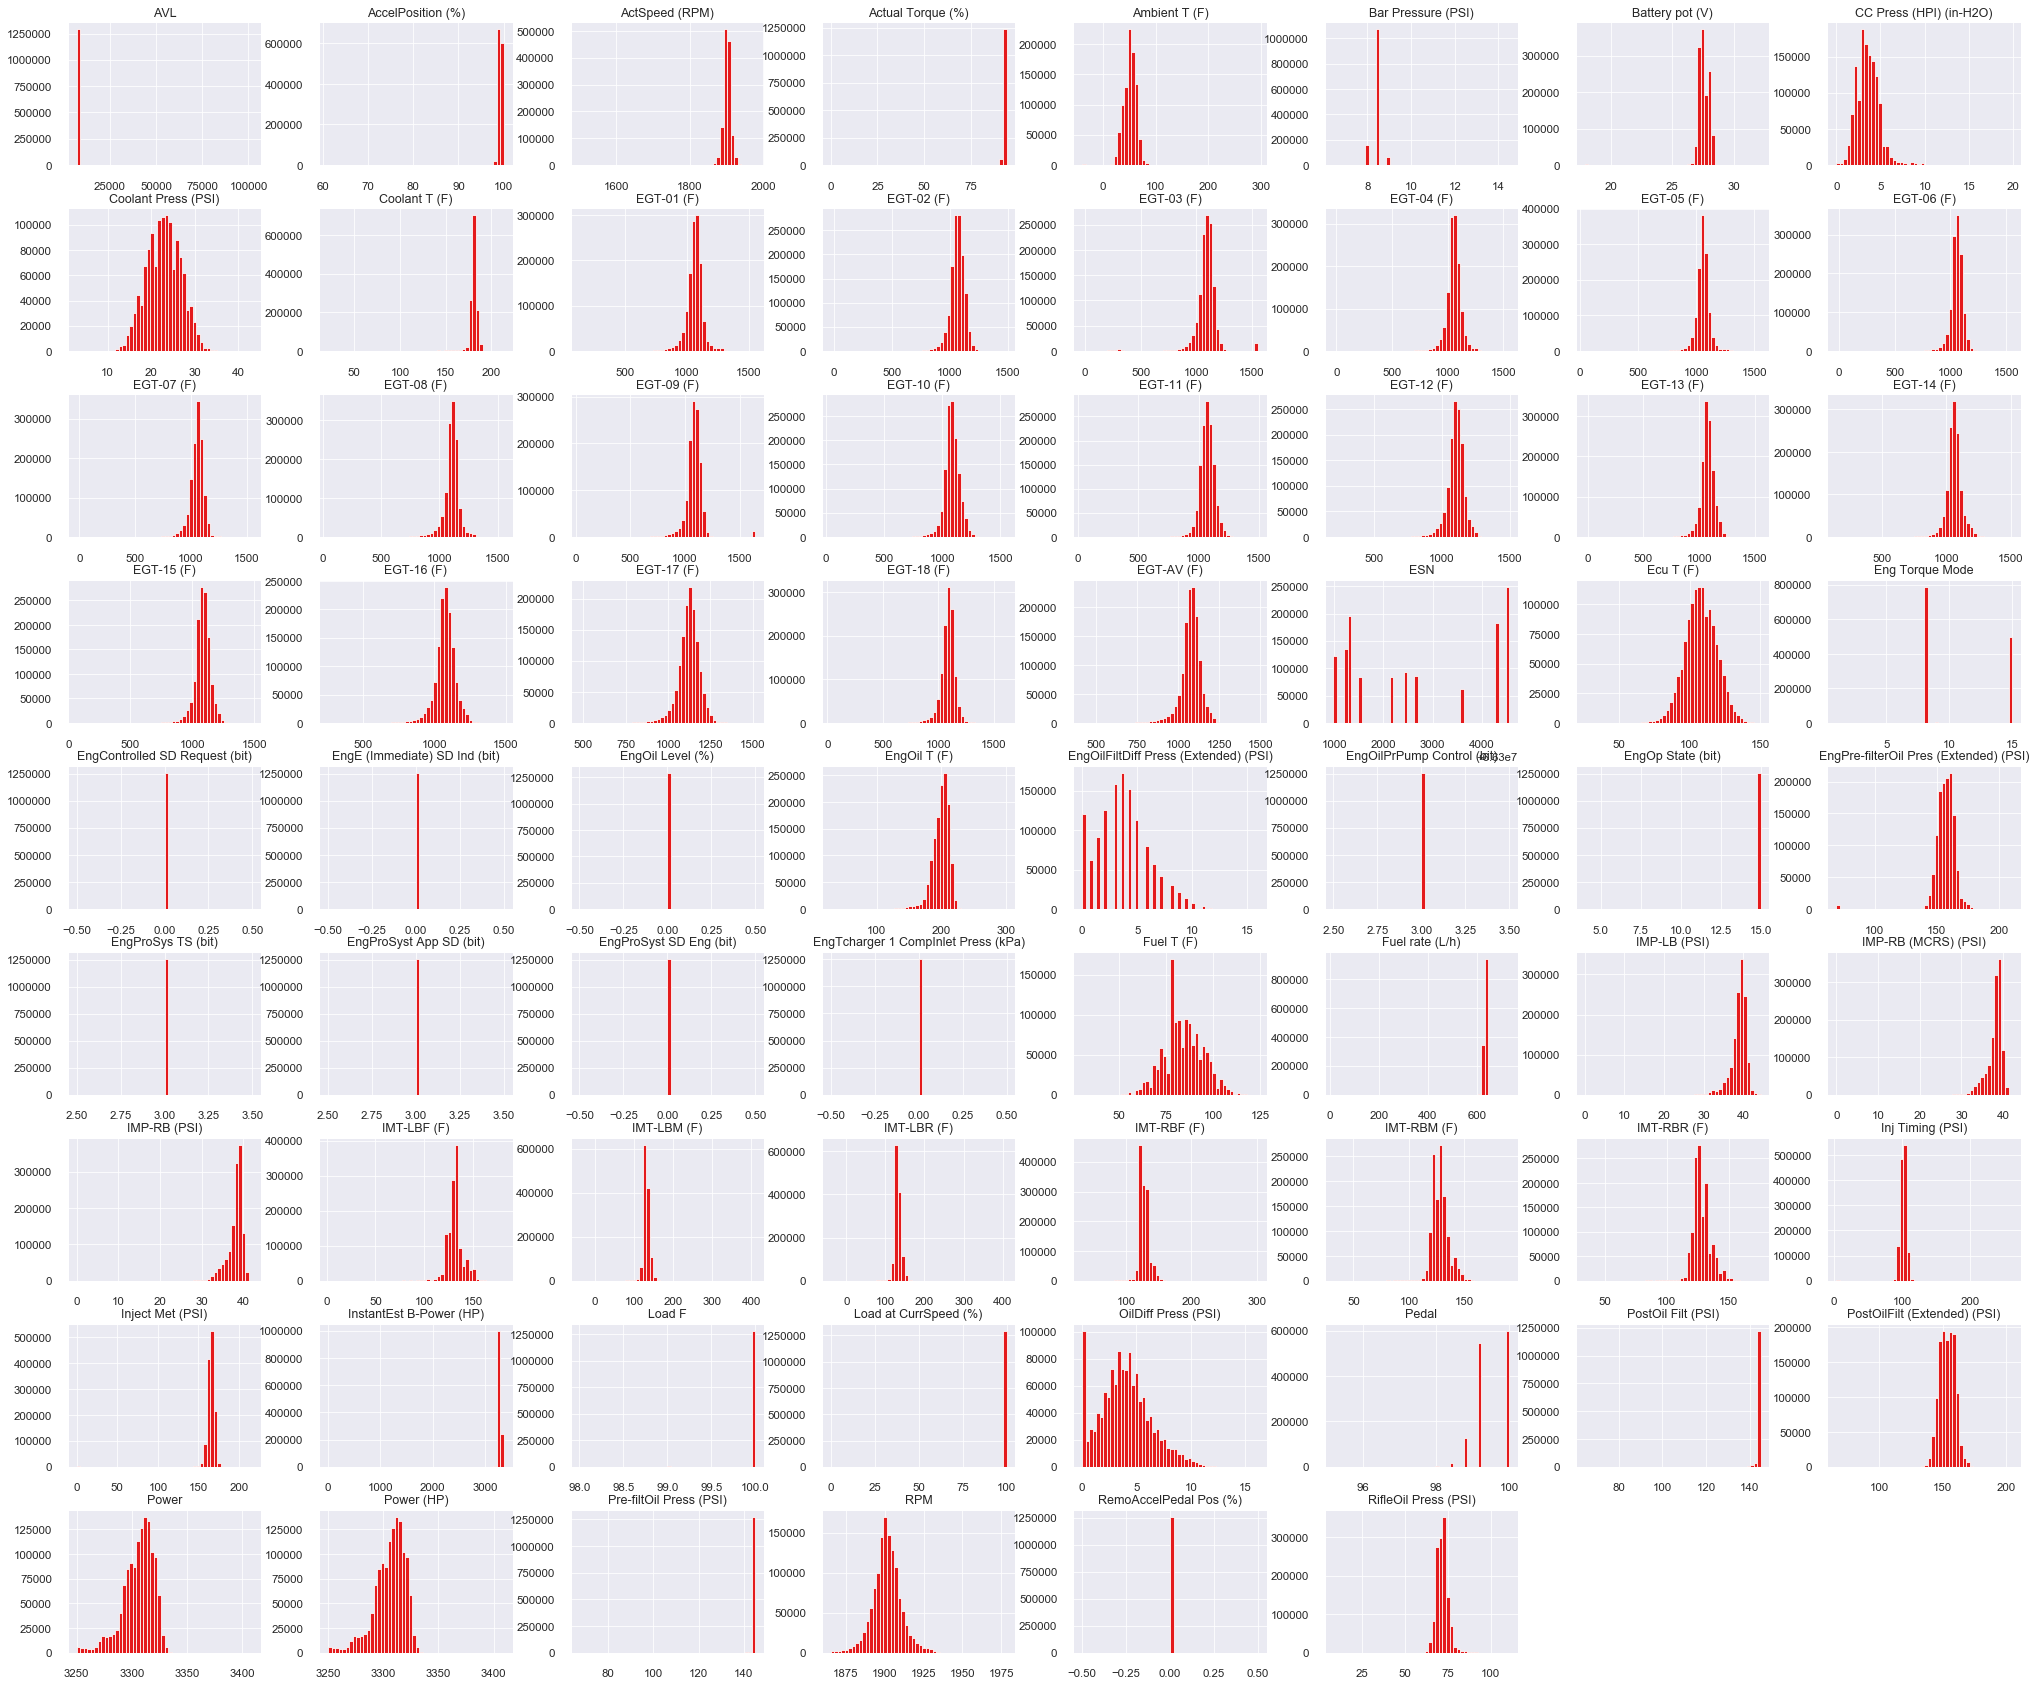

In [11]:
%time filt_df.hist(bins=50, figsize=(35,30))
plt.show()

In order to 

In [12]:
cols2drop =['ESN','AVL','RPM', 'Pedal', 'Load F','Power','Eng Torque Mode', 
            'Actual Torque (%)', 'ActSpeed (RPM)', 'AccelPosition (%)',
           'Load at CurrSpeed (%)', 'Fuel rate (L/h)', 'Bar Pressure (PSI)',
           'IMP-LB (PSI)','Battery pot (V)','Inject Met (PSI)',
           'Inj Timing (PSI)', 'Pre-filtOil Press (PSI)',
           'InstantEst B-Power (HP)','IMP-RB (PSI)', 'IMP-RB (MCRS) (PSI)',
           'OilDiff Press (PSI)','CC Press (HPI) (in-H2O)',
           'EngOil Level (%)', 'PostOil Filt (PSI)', 'RifleOil Press (PSI)',
           'Coolant Press (PSI)', 'RemoAccelPedal Pos (%)',
           'EngPre-filterOil Pres (Extended) (PSI)',
           'PostOilFilt (Extended) (PSI)', 'EngOp State (bit)',
           'EngTcharger 1 CompInlet Press (kPa)', 'EngProSyst SD Eng (bit)',
           'EngProSyst App SD (bit)', 'EngProSys TS (bit)',
           'EngOilFiltDiff Press (Extended) (PSI)',
           'EngOilPrPump Control (bit)', 'EngControlled SD Request (bit)',
           'EngE (Immediate) SD Ind (bit)', 'Power (HP)']

In [13]:
filt_df_F = filt_df.drop(cols2drop, axis=1)
filt_df_F.shape

(1295116, 34)

In [14]:
filt_df_F.dtypes

Vehicle           object
Serv Date         object
AVL Date          object
Eng state         object
IMT-LBF (F)      float64
EGT-AV (F)       float64
Coolant T (F)    float64
Fuel T (F)       float64
EngOil T (F)     float64
IMT-LBR (F)      float64
IMT-RBF (F)      float64
IMT-RBR (F)      float64
Ecu T (F)        float64
EGT-01 (F)       float64
EGT-02 (F)       float64
EGT-03 (F)       float64
EGT-04 (F)       float64
EGT-05 (F)       float64
EGT-06 (F)       float64
EGT-07 (F)       float64
EGT-08 (F)       float64
EGT-09 (F)       float64
EGT-10 (F)       float64
EGT-11 (F)       float64
EGT-12 (F)       float64
EGT-13 (F)       float64
EGT-14 (F)       float64
EGT-15 (F)       float64
EGT-16 (F)       float64
Ambient T (F)    float64
EGT-17 (F)       float64
EGT-18 (F)       float64
IMT-LBM (F)      float64
IMT-RBM (F)      float64
dtype: object

In [15]:
filt_df_F.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IMT-LBF (F),1288420.0,130.510494,9.804740,1.40,125.60,131.00,134.60,181.40
EGT-AV (F),1275153.0,1073.627969,61.655083,413.71,1047.31,1077.91,1108.18,1484.26
Coolant T (F),1295066.0,179.579199,6.924781,21.20,177.80,179.60,181.40,213.80
Fuel T (F),1295072.0,84.088966,10.652964,30.20,77.00,84.20,91.40,123.80
EngOil T (F),1285704.0,199.160902,13.203795,29.19,192.09,201.48,208.29,301.10
IMT-LBR (F),1288334.0,129.503652,8.542948,-40.00,125.60,129.20,132.80,410.00
IMT-RBF (F),1288469.0,126.788582,7.687533,32.00,122.00,125.60,131.00,302.00
IMT-RBR (F),1288487.0,127.896038,8.008955,33.80,123.80,127.40,131.00,176.00
Ecu T (F),1255086.0,107.784965,11.157056,26.09,100.34,107.83,115.19,150.24
EGT-01 (F),1277236.0,1064.533036,67.673885,135.61,1037.08,1069.70,1099.51,1553.00


In [16]:
cols = list(filt_df_F.columns.values)
filt_df_F1 = filt_df_F.iloc[:,4:]
filt_df_F1.mask(filt_df_F1 < 0, 0, inplace=True)

In [17]:
filt_df_F1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IMT-LBF (F),1288420.0,130.510494,9.804740,1.40,125.60,131.00,134.60,181.40
EGT-AV (F),1275153.0,1073.627969,61.655083,413.71,1047.31,1077.91,1108.18,1484.26
Coolant T (F),1295066.0,179.579199,6.924781,21.20,177.80,179.60,181.40,213.80
Fuel T (F),1295072.0,84.088966,10.652964,30.20,77.00,84.20,91.40,123.80
EngOil T (F),1285704.0,199.160902,13.203795,29.19,192.09,201.48,208.29,301.10
IMT-LBR (F),1288334.0,129.507576,8.474861,0.00,125.60,129.20,132.80,410.00
IMT-RBF (F),1288469.0,126.788582,7.687533,32.00,122.00,125.60,131.00,302.00
IMT-RBR (F),1288487.0,127.896038,8.008955,33.80,123.80,127.40,131.00,176.00
Ecu T (F),1255086.0,107.784965,11.157056,26.09,100.34,107.83,115.19,150.24
EGT-01 (F),1277236.0,1064.533036,67.673885,135.61,1037.08,1069.70,1099.51,1553.00


Wall time: 2.19 s


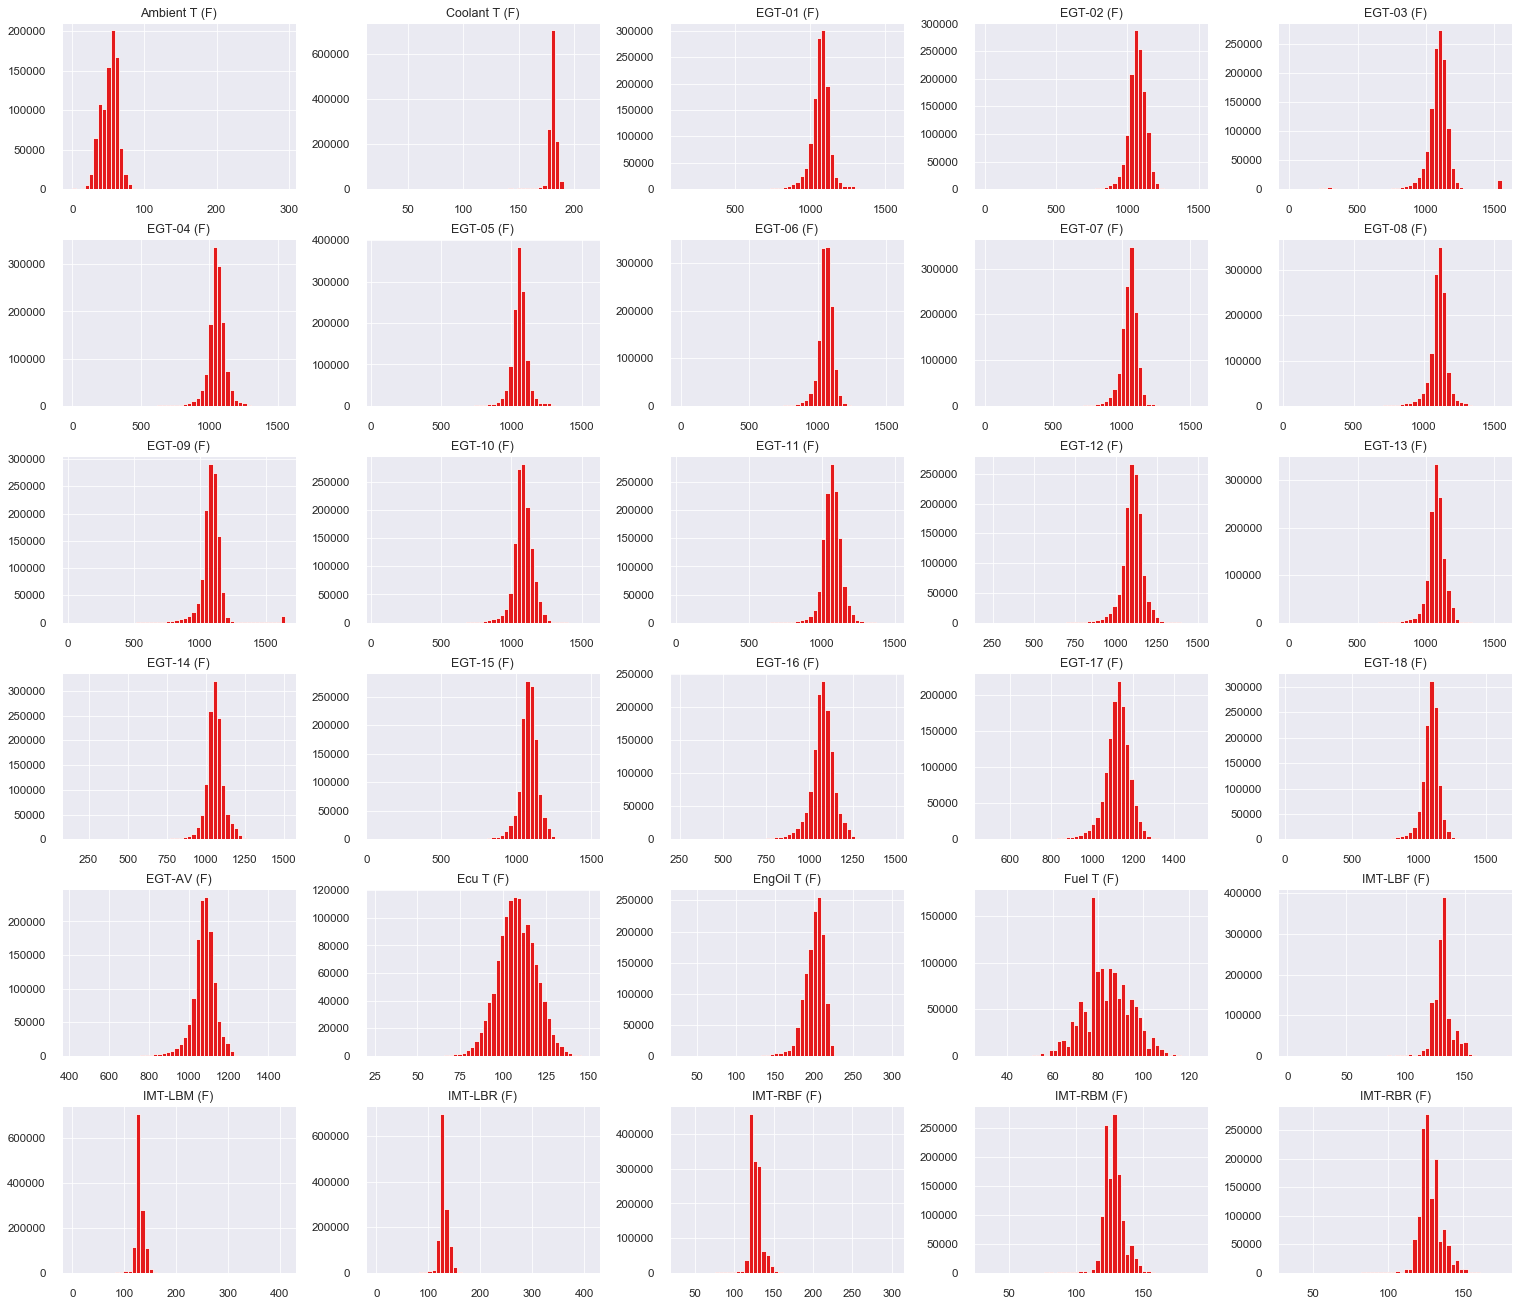

In [18]:
%time filt_df_F1.hist(bins=50, figsize=(26,23))
plt.show()

In [19]:
excelfile = "weight_effectiveHour.xlsx"
weights_df = pd.read_excel(excelfile, sheet_name="Filter_weight")
effhours_df = pd.read_excel(excelfile, sheet_name="Effective_hours")
df = pd.concat([effhours_df, weights_df["PESO FILTRO (kg)"]], axis=1)
df

,CAEX,HRS,PESO FILTRO (kg)
0,CA116,2275,2.27
1,CA117,550,1.89
2,CA119,3124,2.82
3,CA126,1237,2.26
4,CA129,1486,2.31
5,CA130,3321,1.92
6,CA150,2007,2.17
7,CA155,533,2.08
8,CA161,896,2.25
9,CA57,1581,2.30


In [20]:
vehicles = [filt_df_F.Vehicle.unique()[i] for i in range(15)]

In [21]:
np.sum(filt_df_F.Vehicle == vehicles[0])

116765

In [22]:
%time effhours = pd.Series(np.hstack([np.repeat(df["HRS"].iloc[i], np.sum(filt_df_F.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())

Wall time: 1.1 s


In [23]:
%time filtweights = pd.Series(np.hstack([np.repeat(df["PESO FILTRO (kg)"].iloc[i], np.sum(filt_df_F.Vehicle == vehicles[i])) for i in range(df.shape[0])]).flatten())

Wall time: 1.02 s


In [24]:
filt_df_F1["Eff HRS (h)"] = effhours
filt_df_F1["Filter Mass (kg)"] = filtweights
filt_df_F1.head()

,IMT-LBF (F),EGT-AV (F),Coolant T (F),Fuel T (F),EngOil T (F),IMT-LBR (F),IMT-RBF (F),IMT-RBR (F),Ecu T (F),EGT-01 (F),...,EGT-14 (F),EGT-15 (F),EGT-16 (F),Ambient T (F),EGT-17 (F),EGT-18 (F),IMT-LBM (F),IMT-RBM (F),Eff HRS (h),Filter Mass (kg)
0,123.8,766.96,177.8,84.2,178.42,123.8,122.0,123.8,95.84,762.01,...,867.54,812.08,718.59,80.6,786.09,857.75,123.8,118.4,2275,2.27
1,123.8,974.30,179.6,84.2,179.88,122.0,120.2,120.2,95.73,945.28,...,1004.90,982.40,959.56,73.4,1016.38,1025.71,122.0,116.6,2275,2.27
2,125.6,1010.86,179.6,84.2,180.16,123.8,122.0,122.0,95.84,978.46,...,1022.11,1014.80,1007.71,69.8,1059.13,1046.64,125.6,120.2,2275,2.27
3,129.2,1027.18,179.6,84.2,184.04,127.4,125.6,125.6,95.68,993.76,...,1032.80,1031.34,1031.34,68.0,1079.71,1060.59,129.2,123.8,2275,2.27
4,131.0,1035.16,179.6,84.2,185.96,127.4,125.6,125.6,96.13,999.95,...,1037.19,1040.11,1046.08,66.2,1094.34,1068.24,129.2,123.8,2275,2.27


Wall time: 2.51 s


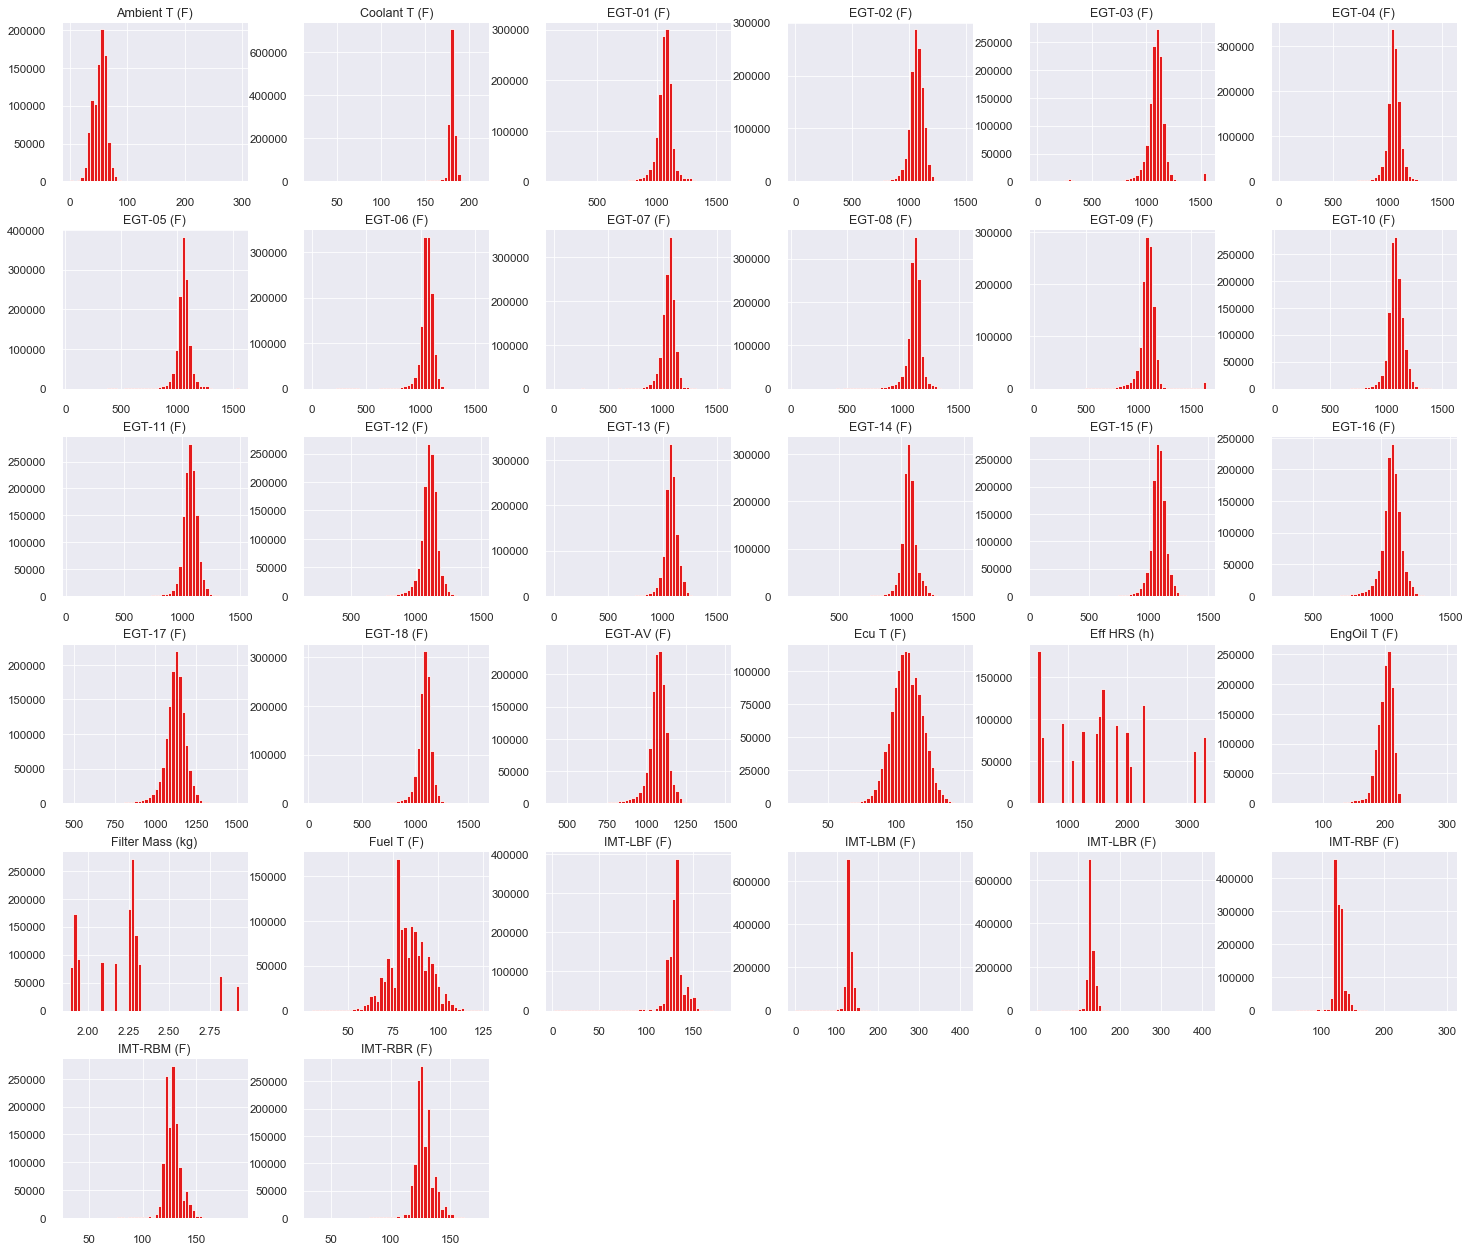

In [25]:
%time filt_df_F1.hist(bins=50, figsize=(25,22))
plt.show()

In [26]:
corr_matrix = filt_df_F1.corr(method='pearson')

In [27]:
%time corr_matrix["Filter Mass (kg)"].sort_values(ascending=False)

Wall time: 532 µs


Filter Mass (kg)    1.000000
Eff HRS (h)         0.348691
EGT-07 (F)          0.024871
EngOil T (F)       -0.034376
EGT-06 (F)         -0.059643
EGT-17 (F)         -0.062868
EGT-08 (F)         -0.073271
Coolant T (F)      -0.074039
EGT-18 (F)         -0.077212
EGT-03 (F)         -0.077947
EGT-05 (F)         -0.080837
EGT-13 (F)         -0.085670
IMT-LBM (F)        -0.087507
EGT-02 (F)         -0.088964
EGT-10 (F)         -0.095373
EGT-04 (F)         -0.109587
EGT-12 (F)         -0.115139
EGT-AV (F)         -0.118544
Ecu T (F)          -0.122552
EGT-11 (F)         -0.124928
EGT-14 (F)         -0.134035
IMT-RBF (F)        -0.137809
IMT-LBR (F)        -0.138750
EGT-15 (F)         -0.147152
EGT-09 (F)         -0.151416
EGT-16 (F)         -0.162537
IMT-RBM (F)        -0.171616
IMT-LBF (F)        -0.183954
Ambient T (F)      -0.184375
Fuel T (F)         -0.184561
EGT-01 (F)         -0.194793
IMT-RBR (F)        -0.233164
Name: Filter Mass (kg), dtype: float64

In [28]:
#from pandas.plotting import scatter_matrix

Wall time: 561 ms


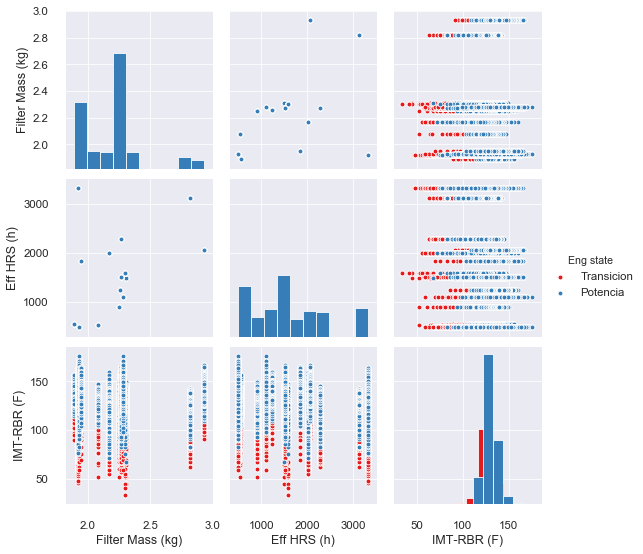

In [29]:
attributes = ["Filter Mass (kg)", "Eff HRS (h)", "IMT-RBR (F)", 'Eng state']
filt_df_F1['Eng state'] = filt_df_F['Eng state']
%time g = sns.PairGrid(filt_df_F1[attributes], hue="Eng state")
g.map_diag(plt.hist, edgecolor="white")
g.map_offdiag(plt.scatter, edgecolor="white")
g.add_legend();

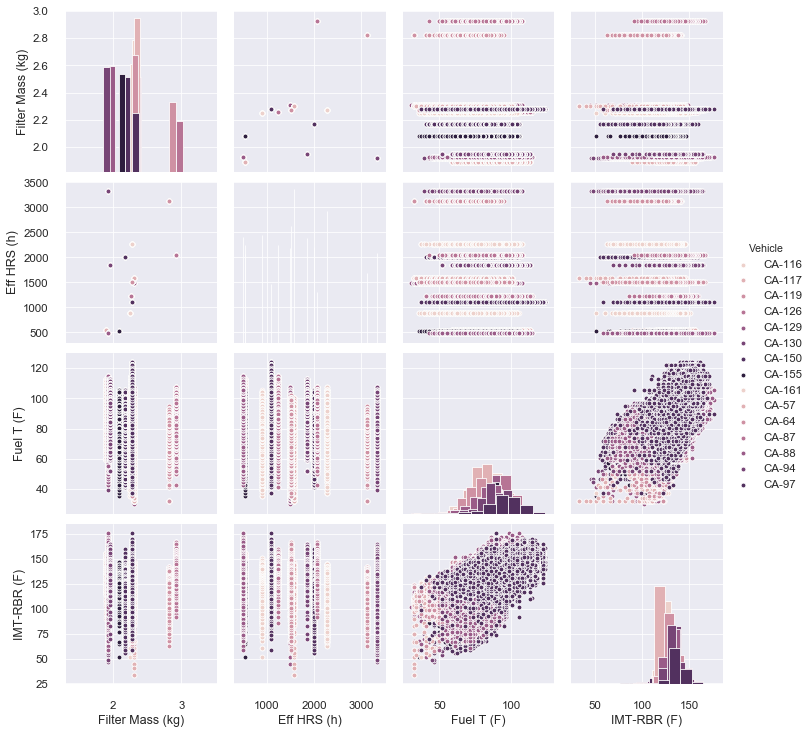

In [30]:
attributes = ["Filter Mass (kg)", "Eff HRS (h)", "Fuel T (F)", "IMT-RBR (F)",'Vehicle']
filt_df_F1['Vehicle'] = filt_df_F['Vehicle']
g = sns.PairGrid(filt_df_F1[attributes], hue="Vehicle", palette=sns.cubehelix_palette(8))
g.map_diag(plt.hist, edgecolor="white")
g.map_offdiag(plt.scatter, edgecolor="white")
g.add_legend();

In [31]:
filt_grouped_df_F = filt_df_F1.groupby(["Vehicle"]).mean()

In [32]:
filt_grouped_df_F

,IMT-LBF (F),EGT-AV (F),Coolant T (F),Fuel T (F),EngOil T (F),IMT-LBR (F),IMT-RBF (F),IMT-RBR (F),Ecu T (F),EGT-01 (F),...,EGT-14 (F),EGT-15 (F),EGT-16 (F),Ambient T (F),EGT-17 (F),EGT-18 (F),IMT-LBM (F),IMT-RBM (F),Eff HRS (h),Filter Mass (kg)
Vehicle,,,,,,,,,,,,,,,,,,,,,
CA-116,128.011736,1042.096329,179.506443,84.167627,198.700968,127.069721,123.358590,122.852774,105.950137,1038.330387,...,1035.516827,1041.403898,1065.028461,52.616563,1101.642912,1069.967503,128.754428,122.788322,2275,2.27
CA-117,137.170276,1072.894482,182.458791,95.889914,202.877612,135.591488,129.709934,131.428945,117.539385,1080.831219,...,1057.184324,1084.411936,1077.401215,44.611960,1139.012776,1094.457403,134.991763,131.077298,550,1.89
CA-119,125.998579,1059.446023,179.390438,74.187324,198.432320,126.427888,124.791351,121.265118,102.536883,1052.133231,...,1043.786718,1051.452507,1045.778889,14.757817,1112.462823,1069.822903,124.867314,122.506467,3124,2.82
CA-126,134.281122,1104.310698,183.714298,93.314878,208.955224,132.894082,127.941002,130.052458,117.979798,1081.484524,...,1065.560718,1094.070325,1119.101540,57.958298,1165.073535,1131.465888,131.546410,128.178399,1237,2.26
CA-129,122.035529,1082.738989,180.552254,86.378109,199.988536,126.898363,124.462994,125.049812,110.599621,1076.206080,...,1038.635926,1109.070454,1083.579727,50.440845,1118.209494,1066.630869,130.763456,128.083601,1486,2.31
CA-130,131.278615,1134.806364,181.616417,84.471398,203.390953,129.597683,127.225473,129.846383,110.646472,1103.787058,...,1158.979056,1158.734037,1161.589583,54.466829,1185.997741,1150.367907,130.065418,127.785093,3321,1.92
CA-150,127.129062,1080.526313,179.430318,78.781087,203.435452,125.766017,123.357559,122.995653,101.670318,1083.984557,...,1064.300443,1093.405247,1038.964519,43.229226,1119.701455,1103.935551,127.873167,126.545673,2007,2.17
CA-155,128.597622,1112.808126,177.850850,83.187714,196.443343,127.662564,126.337901,127.904121,105.408981,1127.311632,...,1105.760810,1129.664169,1101.021987,50.614033,1144.156769,1088.410983,125.751650,125.361657,533,2.08
CA-161,127.363300,1035.210165,166.573284,77.958801,181.006898,123.398071,122.566146,124.491401,101.552286,1041.590834,...,988.507159,1052.599147,1013.809176,47.199259,1074.020063,1028.093065,126.565945,123.525796,896,2.25


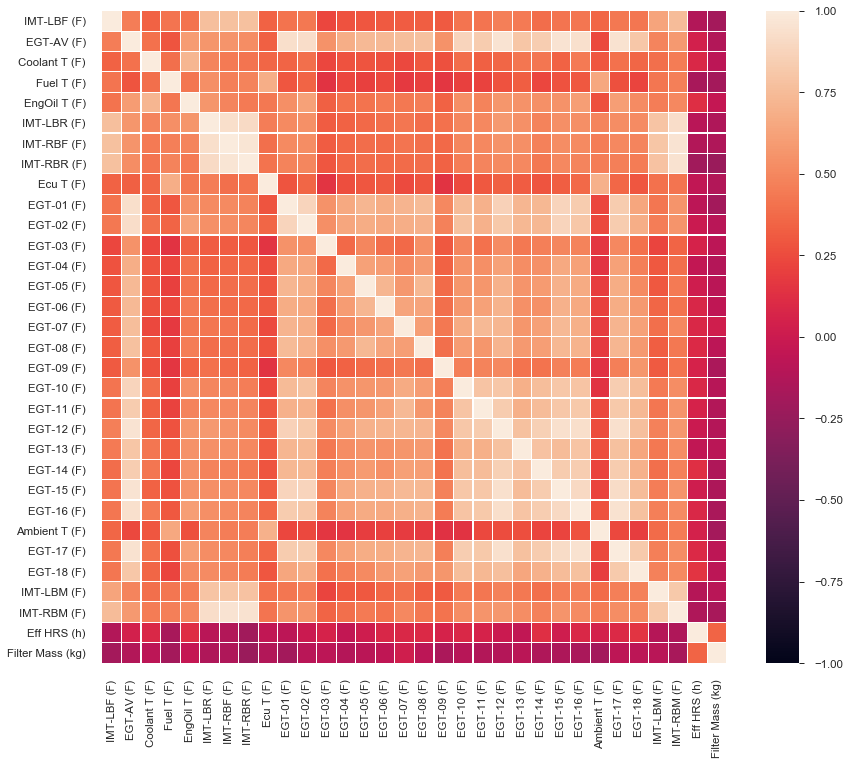

In [33]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr_matrix, linewidths=.1, vmin=-1, vmax=1)